<a href="https://colab.research.google.com/github/VarizkyNaldiba/ML_Ganjil_2025/blob/main/TG2_2341720243_Varizky_Naldiba_Rimra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRAKTIKUM 1

In [ ]:
!pip install -q matplotlib numpy pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Langkah 1 - Load Data


In [ ]:
data = "Titanic-Dataset.csv"
df = pd.read_csv(data)
# df.head()
df.head(100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


Langkah 2 - Pengecekan Data


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Ringkasan Nilai Statistik

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Langkah 3 - Inpeksi Visual

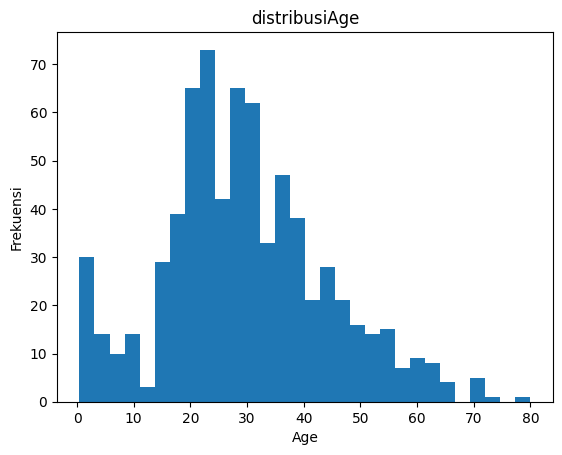

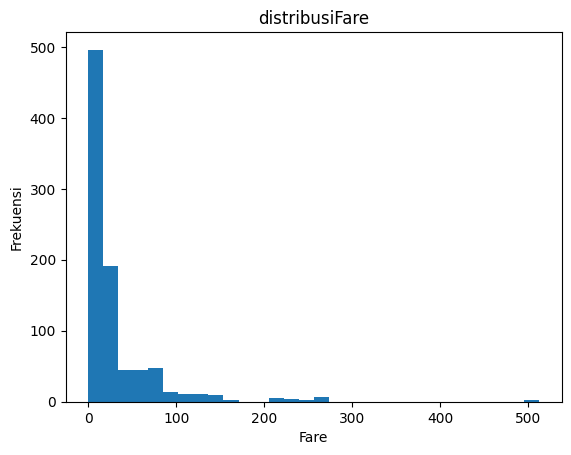

In [ ]:
num_cols = ['Age', 'Fare']
for col in num_cols:
  plt.figure()
  plt.hist(df[col], bins=30)
  plt.title(f'distribusi{col}')
  plt.xlabel(col);
  plt.ylabel('Frekuensi')
  plt.show()


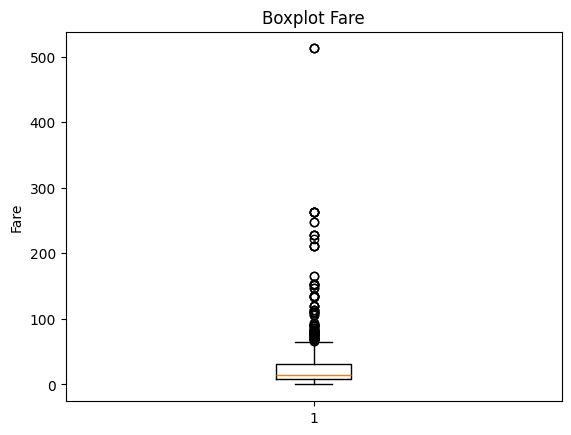

In [ ]:
plt.figure()
plt.boxplot(df['Fare'].dropna(), vert=True)
plt.title('Boxplot Fare')
plt.ylabel('Fare')
plt.show()


Inspeksi Komposisi Variabel Kualitatif


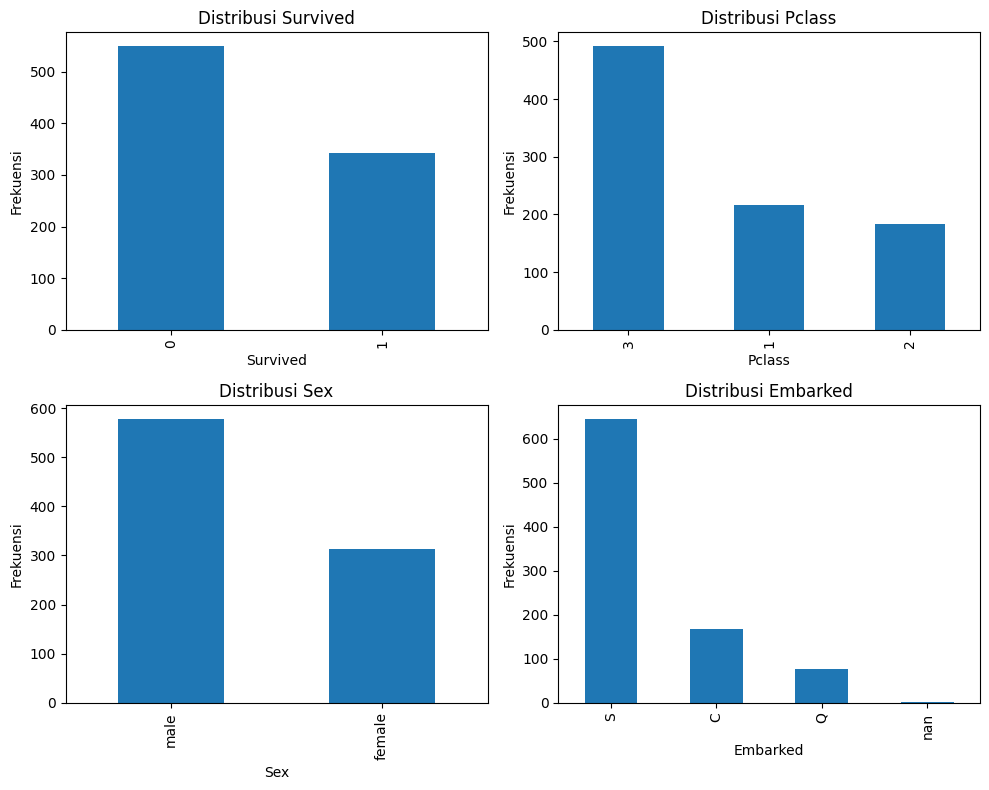

In [ ]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(2,2, figsize=(10,8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
  df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Distribusi {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Inpeksi Korelasi

Heat Map

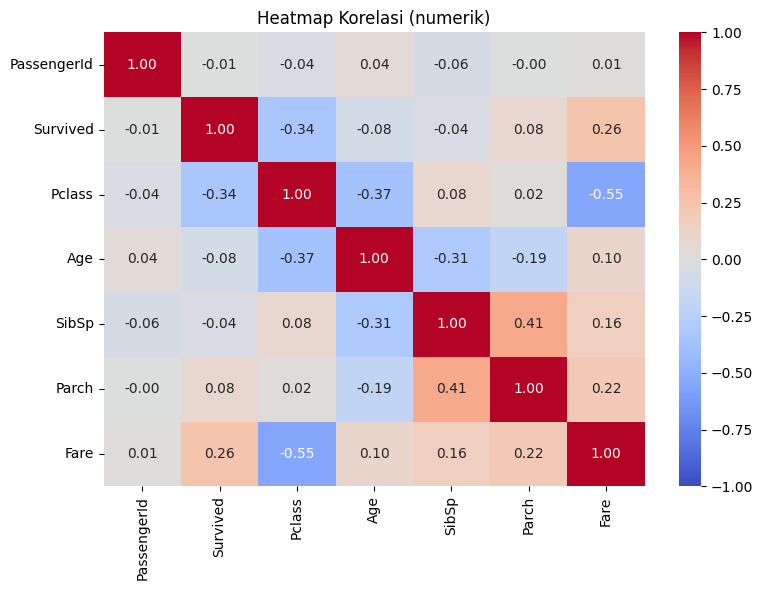

In [ ]:
import seaborn as sns # Import seaborn for enhanced visualization

num_only = df.select_dtypes(include=[np.number])
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6)) # Increased figure size for better readability
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f") # Use seaborn.heatmap with annotation
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

In [ ]:
corr['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


Scatter Plot

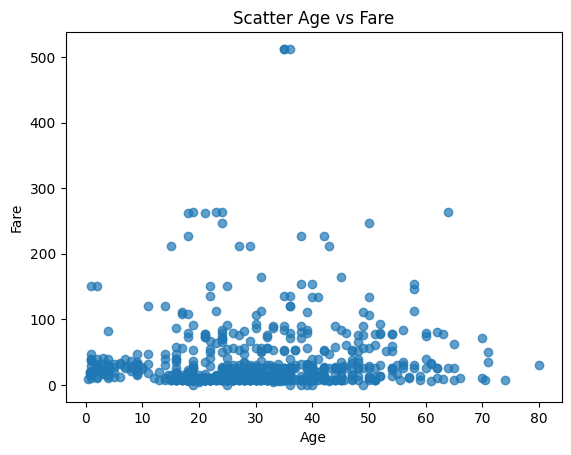

In [ ]:
plt.figure()
surv_map = {0:'No', 1:'Yes'}
plt.scatter(df['Age'], df['Fare'], alpha=0.7)
plt.xlabel('Age'); plt.ylabel('Fare')
plt.title('Scatter Age vs Fare')
plt.show()


#PRAKTIKUM 2


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,DECK,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,DECK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,DECK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,DECK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,DECK,C


#PRAKTIKUM 3

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
dpath = 'Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [ ]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Cabin'] = le.fit_transform(df['Cabin'])

In [ ]:
df.head(10)

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.000000,1,115
1,1,1,38.000000,0,81
2,1,3,26.000000,0,115
3,1,1,35.000000,0,55
4,0,3,35.000000,1,115
5,0,3,29.699118,1,115
6,0,1,54.000000,1,130
7,0,3,2.000000,1,115
8,1,3,27.000000,0,115
9,1,2,14.000000,0,115


In [ ]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

In [ ]:
df.head(10)

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-5.924806e-01,1,115
1,1,1,6.387890e-01,0,81
2,1,3,-2.846632e-01,0,115
3,1,1,4.079260e-01,0,55
4,0,3,4.079260e-01,1,115
5,0,3,-2.232906e-16,1,115
6,0,1,1.870059e+00,1,130
7,0,3,-2.131568e+00,1,115
8,1,3,-2.077088e-01,0,115
9,1,2,-1.208115e+00,0,115


#PRAKTIKUM 4

In [ ]:
!pip install  -1 opencv-python matplotlib


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -1


In [ ]:
import cv2
import matplotlib.pyplot as plt



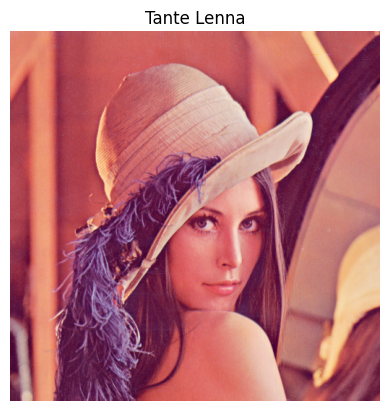

In [ ]:
img = cv2.imread('Lenna.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Tante Lenna')
plt.axis('off')
plt.show()

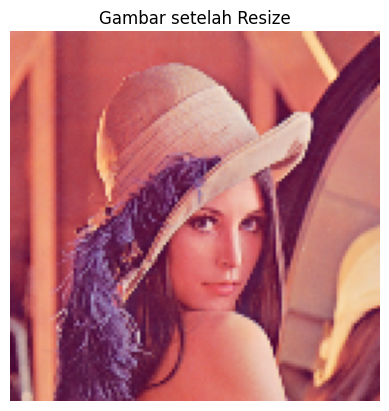

In [ ]:
img_resized = cv2.resize(img_rgb,(128,128))

plt.imshow(img_resized)
plt.title('Gambar setelah Resize')
plt.axis('off')
plt.show()

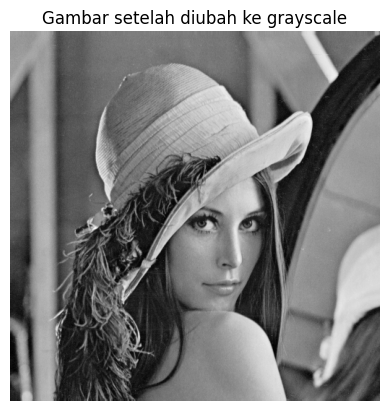

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title('Gambar setelah diubah ke grayscale')
plt.axis('off')
plt.show()


#TUGAS PRAKTIKUM

In [ ]:
!pip install -q matplotlib numpy pandas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [ ]:
data = '/content/drive/MyDrive/Kuliah/csv - csvan/wbc.csv'
tp = pd.read_csv(data)

In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.



In [ ]:
unusable_cols = []

# Tambahkan kolom ID
if "id" in tp.columns:
    unusable_cols.append("id")

# Kolom dengan semua missing values
null_all_cols = tp.columns[tp.isnull().all()].tolist()
unusable_cols.extend(null_all_cols)

# Buat list variabel yang bisa digunakan
usable_cols = [col for col in tp.columns if col not in unusable_cols]

print("Kolom yang bisa digunakan: ")
usable_cols



Kolom yang bisa digunakan: 


['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis_encoded']

In [ ]:
print("Kolom yang tidak bisa digunakan: ")
unusable_cols

Kolom yang tidak bisa digunakan: 


['id', 'Unnamed: 32']

2. Lakukan proses encoding pada kolom "diagnosis".



In [ ]:
# Encode kolom "diagnosis" (B = Benign, M = Malignant)
tp["diagnosis_encoded"] = tp["diagnosis"].map({"B": 0, "M": 1})

# Cek hasil
tp[["diagnosis", "diagnosis_encoded"]].head(100)
tp["diagnosis_encoded"].head(100)


,diagnosis_encoded
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,0
97,0
98,0


In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Lakukan proses standardisasi pada semua kolom yang memiliki nilai numerik.



In [ ]:
std = StandardScaler()

# Pilih semua kolom yang ingin distandarisasi
cols_to_scale = [
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst'
]

# Lakukan standardisasi
tp[cols_to_scale] = std.fit_transform(tp[cols_to_scale])

tp[cols_to_scale].head(100)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.741776,0.870405,1.665360,1.732374,-0.397123,0.510913,0.724430,0.977872,1.034609,-0.894169,...,1.646474,0.962859,1.454704,1.528359,-0.586024,0.633818,0.660194,0.650081,1.275206,-0.014730
96,-0.553058,-0.337343,-0.584037,-0.579597,0.579267,-0.640010,-0.802254,-0.503219,0.322675,0.503588,...,-0.712196,-0.774684,-0.748256,-0.677470,-0.805204,-1.022181,-1.066914,-0.849434,-1.089989,-0.564455
97,-1.232704,0.151341,-1.229900,-1.024984,0.429819,-0.972798,-1.029135,-1.057093,-1.685343,0.865077,...,-1.107724,0.099787,-1.145302,-0.904416,-0.033692,-1.014866,-1.207529,-1.382518,-1.563999,0.328848
98,-0.717787,-1.500877,-0.726143,-0.689095,-0.464730,-0.551317,-0.588066,-0.397721,-0.699589,0.428455,...,-0.664567,-1.386977,-0.723832,-0.647058,0.470421,-0.439986,-0.383747,-0.458568,-0.208298,0.200283
